C:\Users\91982\AppData\Local\Temp\ipykernel_12364\804726743.py:24: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  shi_tomasi_corners = np.int0(shi_tomasi_corners)  # Convert to integer


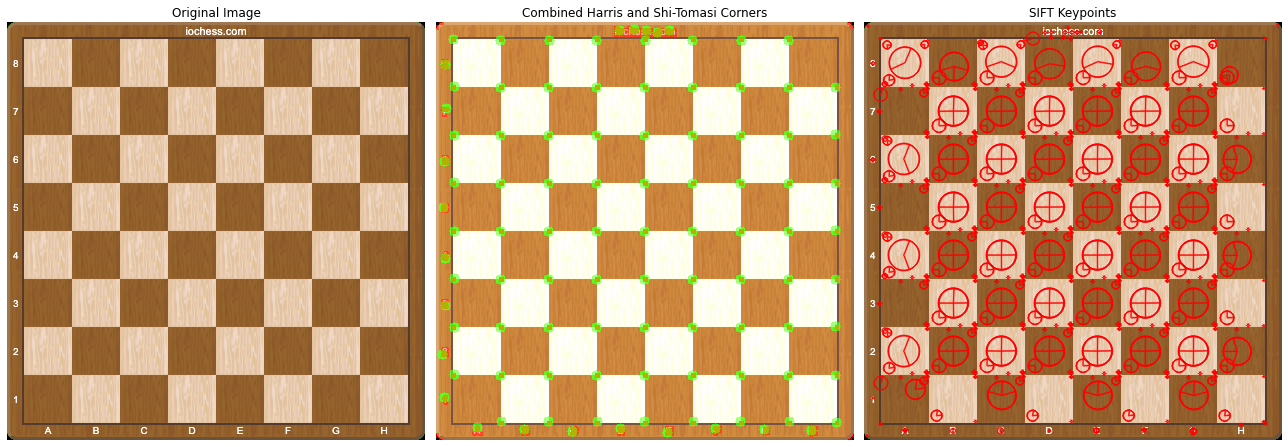

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = 'C:/Users/91982/Desktop/experiment cv/img3.jpeg'
img = cv2.imread(img_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
harris_corners = cv2.dilate(harris_corners, None)
img_harris = img.copy()
# Mark corners in red where the response is above 1% of the max response
harris_threshold = 0.01 * harris_corners.max()
img_harris[harris_corners > harris_threshold] = [0, 0, 255]  # Red

# Shi-Tomasi Corner Detection
shi_tomasi_corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
img_shi_tomasi = img.copy()
if shi_tomasi_corners is not None:
    shi_tomasi_corners = np.int0(shi_tomasi_corners)  # Convert to integer
    for corner in shi_tomasi_corners:
        x, y = corner.ravel()
        cv2.circle(img_shi_tomasi, (x, y), 5, (0, 255, 0), -1)  # Draw circles in green

# Combine Harris and Shi-Tomasi Corners in one image
combined_corners = cv2.addWeighted(img_harris, 0.7, img_shi_tomasi, 0.7, 0)

# SIFT Keypoint Detection
sift = cv2.SIFT_create()
keypoints_sift, descriptors_sift = sift.detectAndCompute(gray, None)
# Draw SIFT keypoints in red
img_sift = cv2.drawKeypoints(img, keypoints_sift, None, color=(0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plotting the results
plt.figure(figsize=(18, 8))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Combined Corners Output
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(combined_corners, cv2.COLOR_BGR2RGB))
plt.title("Combined Harris and Shi-Tomasi Corners")
plt.axis("off")

# SIFT Keypoints Output
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints")
plt.axis("off")

plt.tight_layout()
plt.show()
